<a id="0"></a> <br>
# Used Car Price Prediction

__Dataset Source:__ https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

People buy used cars all around the world. The objective of this analysis is to develop a simple model to predict
selling price of used cars. The selling price of cars is based on various factors and we
analysed these explanatory variables to see the effect of these variables on the selling price of
the cars.

After the regression model is defined, we will also see if the model could be further improved by looking at the residual plot and comparing the actual results.

__Content:__
1. [Global Environment](#11)    
1. [Import Package](#12)
1. [Read Data](#13) 
1. [Check if missing value exists](#14) 
1. [Data pre-processing](#15)    
    1. [Variable selections](#151)
    1. [Create new column "Age"](#152)
    1. [Correlation Analysis](#153) 
    1. [Encode catagorical variables](#154)
1. [Data Analysis](#16)   
    1. [Boxplot graphs, Histograms and Q-Q plots](#161)
    1. [Create new variable after analysis](#162)
1. [Training a Linear Regression Model](#17) 
    1. [Select explanatory and response variables from the dataset](#171)
    1. [Split into training and testing dataset](#172)
    1. [Create and train the baseline model](#173)
    1. [Model Evaluation](#174)    
    1. [Joint plot and residual plot](#175)  
1. [Improved model: Log transformation](#18)  
    1. [Q-Q plots after log transformation](#181)
    1. [Split into training and testing dataset using transformed variables](#182)
    1. [Create and train the improved model](#183)
    1. [Model Evaluation](#184)    
    1. [Joint plot and residual plot](#185) 
1. [Conclusion and potential further improvements](#19)  

<a id="11"></a> <br>
## 1. Global Environment

In [1]:
! python --version

Python 3.9.12


<a id="12"></a> <br>
## 2. Import Package

In [40]:
import pandas as pd 
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")

<a id="13"></a> <br>
## 3. Read Data

In [41]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<a id="14"></a> <br>
## 4. Check if missing value exists

In [42]:
len(df)

4340

In [43]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

No missing value found in this dataset.

<a id="15"></a> <br>
## 5. Data pre-processing

<a id="151"></a> <br>
### A. Variable selections

Except the name of car, it's suggested to use all catagorical and numerical variables in the precition model.

<a id="152"></a> <br>
### B. Create new column "Age"

Age was the new column that was added to the dataset. This was done in order to study the
effect age of car has on selling price of the car. Age is calculated by __"current year – year"__
in the dataset.

In [44]:
df['year'].head()

0    2007
1    2007
2    2012
3    2017
4    2014
Name: year, dtype: int64

In [45]:
current_year = datetime.datetime.now().year

In [46]:
df['age'] = current_year-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


<a id="153"></a> <br>
### C. Correlation Analysis

In [47]:
corr_matrix = df.corr()
corr_matrix

,year,selling_price,km_driven,age
year,1.000000,0.413922,-0.419688,-1.000000
selling_price,0.413922,1.000000,-0.192289,-0.413922
km_driven,-0.419688,-0.192289,1.000000,0.419688
age,-1.000000,-0.413922,0.419688,1.000000


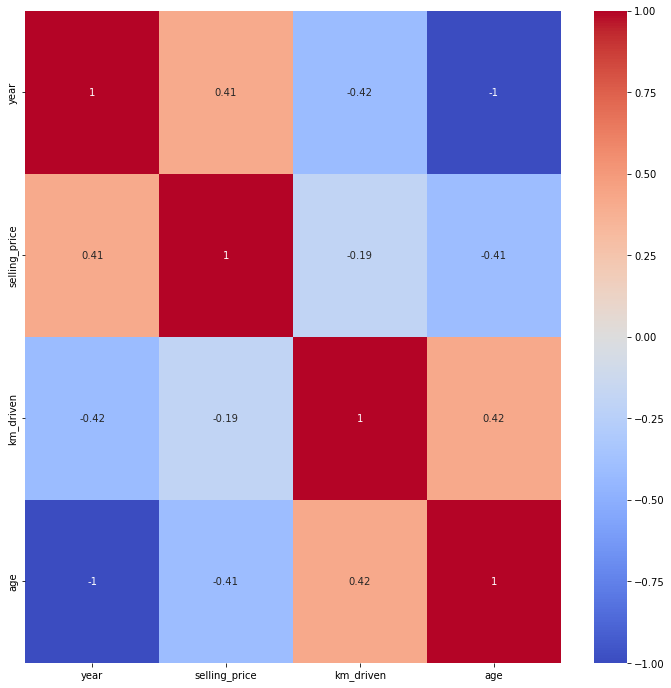

In [48]:
fig, ax = plt.subplots(figsize=(12, 12))

# Create heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

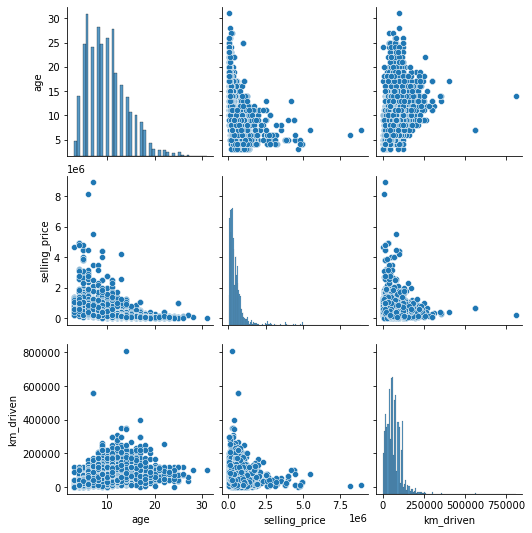

In [49]:
columns = ['age', 'selling_price', 'km_driven']
sns.pairplot(df[columns])
plt.show()

Car age and selling price have a moderate negative correlation. This means, the higher the age of the car, the lesser will be the selling price. The same is also evident from the scatter plot matrix.
Also, the correlation coefficient shows that km_driven and Selling price has a moderate negative correlation.
Therefore, the more kilometers are driven by a car, the lesser shall be selling price.
Scatter plot matrix shows similar trend.

<a id="154"></a> <br>
### D. Encode catagorical variables

There're several ways to encode catagorical variables, such as create dictionary for code mapping or using LabelEncoder in sklearn.preprocessing. In this part, we use LabelEncoder to encode nominal variables "fuel", "seller_type", "transmission" to discrete numeric variables.

In [50]:
#fuel
print(df['fuel'].value_counts())
print("---------------------------")
#seller_type
print(df['seller_type'].value_counts())
print("---------------------------")
#transmission
print(df['transmission'].value_counts())
print("---------------------------")
#owner
print(df['owner'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
---------------------------
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
---------------------------
Manual       3892
Automatic     448
Name: transmission, dtype: int64
---------------------------
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [51]:
le = LabelEncoder()
df['transmission_encoded'] = le.fit_transform(df['transmission'])

For nominal variables, one-hot encoding is used as there is no inherent order or magnitude between categories. Dummy variables are created in this case.

In [52]:
# apply one-hot encoding
fuel_one_hot_encoded = pd.get_dummies(df['fuel'])
seller_type_one_hot_encoded = pd.get_dummies(df['seller_type'])

In [53]:
# concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, fuel_one_hot_encoded, seller_type_one_hot_encoded], axis=1)

In [54]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,transmission_encoded,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16,1,0,0,0,0,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16,1,0,0,0,0,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11,1,0,1,0,0,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6,1,0,0,0,0,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9,1,0,1,0,0,0,0,1,0


Generally, the car price decrease for higher number of owners.
Since "owner" is ordinal variable, it's suggested to use dictionary to define the encoding.

In [55]:
df.replace({"owner": 
            {"First Owner":1, 
             "Second Owner":2, 
             "Third Owner": 3, 
             "Fourth & Above Owner": 4, 
             "Test Drive Car": 0}
           }, inplace=True)

In [56]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,transmission_encoded,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,16,1,0,0,0,0,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,16,1,0,0,0,0,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,11,1,0,1,0,0,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,6,1,0,0,0,0,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,9,1,0,1,0,0,0,0,1,0


<a id="16"></a> <br>
## 6. Data Analysis

<a id="161"></a> <br>
### A. Boxplot graphs, Histograms and Q-Q plots

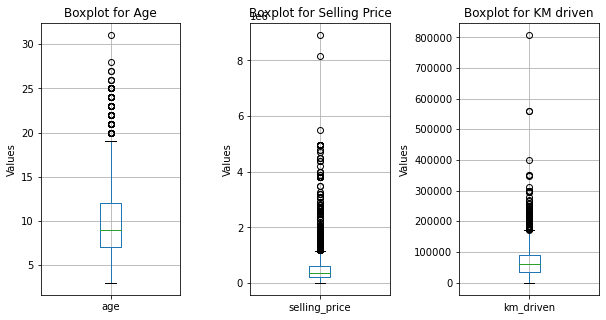

In [57]:
# create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))


# create a boxplot for each column and place it in the corresponding subplot
df[['age']].boxplot(ax=axes[0])
df[['selling_price']].boxplot(ax=axes[1])
df[['km_driven']].boxplot(ax=axes[2])

axes[0].set_title('Boxplot for Age')
axes[0].set_ylabel('Values')

axes[1].set_title('Boxplot for Selling Price')
axes[1].set_ylabel('Values')

axes[2].set_title('Boxplot for KM driven')
axes[2].set_ylabel('Values')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

From the above box plots it's found that outliers present the in selling price.
On checking for the corresponding values in the dataset we saw that the high price was for
luxury cars such as Mercedez and Audi. Therefore, these outliers are expected and it's not neccessary to remove them. Instead, the model could consider addding the new categorical variable "make" which can be splited from the variable "name".

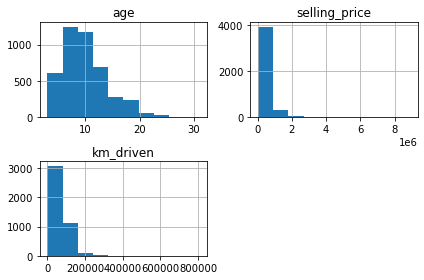

In [58]:
# histograms
df.hist(column=['age', 'selling_price', 'km_driven'])
plt.tight_layout()
plt.show()

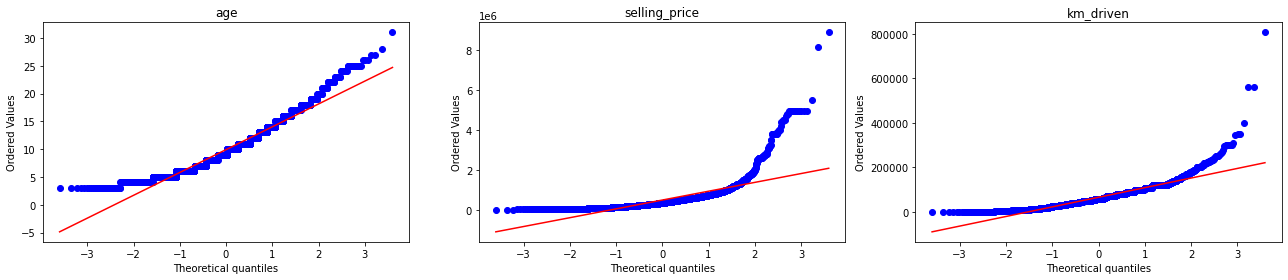

In [59]:
# QQ Plot
columns = ['age', 'selling_price', 'km_driven']

fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(6 * len(columns), 4))

# Iterate over the specified columns and create Q-Q plots
for i, col in enumerate(columns):
    ax = axes[i]
    stats.probplot(df[col], dist='norm', plot=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

From the Q-Q plot, it is found that distribution of both variables age, selling and km driven not "perfectly" follow a specific theoretical distribution. Non-linear relationships may exist. In this analysis, we will create a baseline linear regression model, then we try to further explore other relationship from the predicted values.

<a id="162"></a> <br>
### B. Create new variable after analysis

In [60]:
# extract characters before the first space
df['make'] = df['name'].str.split().str[0]

In [61]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,transmission_encoded,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,make
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,16,1,0,0,0,0,1,0,1,0,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,16,1,0,0,0,0,1,0,1,0,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,11,1,0,1,0,0,0,0,1,0,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,6,1,0,0,0,0,1,0,1,0,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,9,1,0,1,0,0,0,0,1,0,Honda


In [62]:
df['make'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: make, dtype: int64

Again, one-hot encoding is used for nominal variables.

In [63]:
# encoding
make_one_hot_encoded = pd.get_dummies(df['make'])
# concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, make_one_hot_encoded], axis=1)

In [64]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,transmission_encoded,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,16,1,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,16,1,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,11,1,...,0,0,0,0,0,0,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,6,1,...,0,0,0,0,0,0,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,9,1,...,0,0,0,0,0,0,0,0,0,0


<a id="17"></a> <br>
## 7. Training a Linear Regression Model

<a id="171"></a> <br>
### A. Select explanatory and response variables from the dataset

In [65]:
# display column names
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'age', 'transmission_encoded', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Dealer', 'Individual', 'Trustmark Dealer',
       'make', 'Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')


In [66]:
x_col = ['km_driven', 'owner', 'age', 'transmission_encoded', 'CNG', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Dealer', 'Individual', 'Trustmark Dealer',
       'Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo']
X = df[x_col]
X.head()

,km_driven,owner,age,transmission_encoded,CNG,Diesel,Electric,LPG,Petrol,Dealer,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,70000,1,16,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,50000,1,16,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100000,1,11,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46000,1,6,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,141000,2,9,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y = df.loc[:,['selling_price']]
y.head()

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000


<a id="172"></a> <br>
### B. Split into training and testing dataset

In [68]:
# Use 20% of training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3472, 41)
(868, 41)
(3472, 1)
(868, 1)


<a id="173"></a> <br>
### C. Create and train the baseline model

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression()

<a id="174"></a> <br>
### D. Model Evaluation

In [72]:
# print the intercept
print(lm.intercept_)

[1656736.55710752]


In [73]:
coeff_df = pd.DataFrame(lm.coef_.reshape((41,)), X.columns, columns=['Coefficient']) #all columns name is index
coeff_df

,Coefficient
km_driven,-1.029884e+00
owner,-1.041074e+04
age,-4.111780e+04
transmission_encoded,-3.077937e+05
CNG,4.085997e+04
Diesel,2.226678e+05
Electric,-4.141799e+05
LPG,9.315487e+04
Petrol,5.749725e+04
Dealer,-8.062643e+04


Interpreting the coefficients: (For KM Driven, Car Age and Transmission)

- Holding all other features fixed, a 1 unit increase in **KM Driven** is associated with an **decrease of \$1.03 ** in car price.
- Holding all other features fixed, a 1 unit increase in **Age** is associated with an **decrease of \$0.0001 ** in car price.
- Holding all other features fixed, **Transmission (Manual)** is associated with an **decrease of \$0.00003 ** in car price.

Since the model with 41 variables and each of them has very small coefficient values, it suggests that the impact of those variables on the target variable is relatively small compared to other variables or factors in the model.

In [74]:
y_hat = lm.predict(X_test)

In [75]:
y_test = np.ravel(y_test)
y_hat = np.ravel(y_hat)

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))
print('MSE:', metrics.mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print("R2 score:", r2_score(y_test, y_hat))

MAE: 173467.67367025663
MSE: 83955083253.38564
RMSE: 289750.0358125701
R2 score: 0.7142054152809166


<a id="175"></a> <br>
### E. Joint plot and residual plot for numeric variables

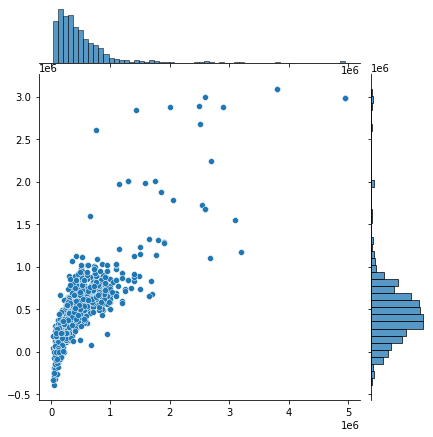

In [77]:
sns.jointplot(y_test,y_hat,kind='scatter')

The joint plot can be used to examine the residuals, which are the differences between the predicted and actual values. By visualizing the relationship between the residuals and the predicted values, we can identify any patterns or systematic errors in the model's predictions.

Above pair plot between actual and predicted values shows a pattern that resembles a logarithmic distribution, it suggests that the relationship between the two variables is nonlinear and may benefit from a logarithmic transformation.

In [78]:
# Calculate the residuals
residuals = y_test - y_hat

x_km = np.ravel(X_test.iloc[:,0])
x_age = np.ravel(X_test.iloc[:,2])

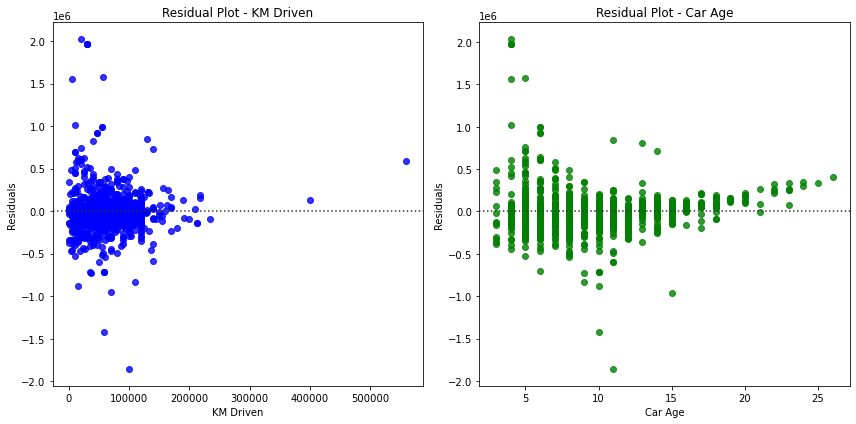

In [79]:
plt.figure(figsize=(12, 6))

# Subplot 1: Residual plot for KM Driven
plt.subplot(1, 2, 1)
sns.residplot(x_km, residuals, color='blue')
plt.xlabel('KM Driven')
plt.ylabel('Residuals')
plt.title('Residual Plot - KM Driven')

# Subplot 2: Residual plot for car age
plt.subplot(1, 2, 2)
sns.residplot(x_age, residuals, color='green')
plt.xlabel('Car Age')
plt.ylabel('Residuals')
plt.title('Residual Plot - Car Age')

plt.tight_layout()
plt.show()

The residual plots also show the presence of heteroscedasticity, as the residuals exhibit a “cone” shape – they’re not distributed with equal variance throughout the plot. Therefore, we consider to improve the model by transforming to log of selling price.

<a id="18"></a> <br>
## 8. Improved model: Log transformation

<a id="181"></a> <br>
### A. Q-Q plots after log transformation

In [80]:
# apply a logarithmic transformation to selling price
log_selling_price = np.log(df['selling_price'])

In [81]:
log_selling_price

0       11.002100
1       11.813030
2       13.304685
3       12.429216
4       13.017003
          ...    
4335    12.923910
4336    12.923910
4337    11.608236
4338    13.670485
4339    12.323856
Name: selling_price, Length: 4340, dtype: float64

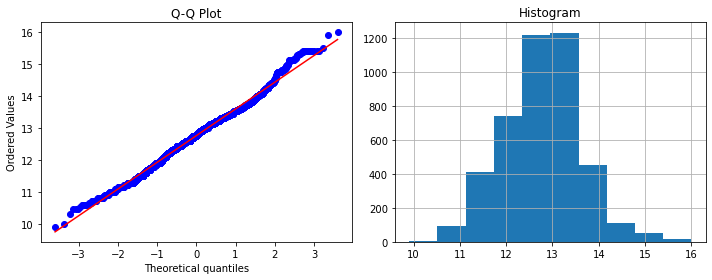

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Q-Q plot
ax1 = axes[0]
stats.probplot(log_selling_price, dist='norm', plot=ax1)
ax1.set_title('Q-Q Plot')

# Histogram
ax2 = axes[1]
log_selling_price.hist(ax=ax2)
ax2.set_title('Histogram')

plt.tight_layout()
plt.show()

It's clearly that log(selling_price) follows a normal
distribution in when compared to selling_price. From the plots, we could consider log(selling_price) as the response variable in stead of selling_price in regression model.

<a id="182"></a> <br>
### B. Split into training and testing dataset using transformed variables

In [83]:
# Use 20% of training data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, log_selling_price, test_size=0.2, random_state=101)

In [84]:
print(X_train_log.shape)
print(X_test_log.shape)
print(y_train_log.shape)
print(y_test_log.shape)

(3472, 41)
(868, 41)
(3472,)
(868,)


<a id="183"></a> <br>
### C. Create and train the improved model

In [85]:
lm_log = LinearRegression()

In [86]:
lm_log.fit(X_train_log,y_train_log)

LinearRegression()

<a id="184"></a> <br>
### D. Model Evaluation

In [87]:
y_hat_log = lm_log.predict(X_test_log)

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test_log, y_hat_log))
print('MSE:', metrics.mean_squared_error(y_test_log, y_hat_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_log, y_hat_log)))
print("R2 score:", r2_score(y_test_log, y_hat_log))

MAE: 0.2976789337180137
MSE: 0.14328504605848516
RMSE: 0.378530112485764
R2 score: 0.8002384683678572


Compared the result with the baseline model in section 7, both MAE, MSE and RSME have significantly decrease.
R2 score also increase from 0.71 to 0.80. The performance of the model has been improved significantly.

<a id="185"></a> <br>
### E. Joint plot and residual plot for numeric variables

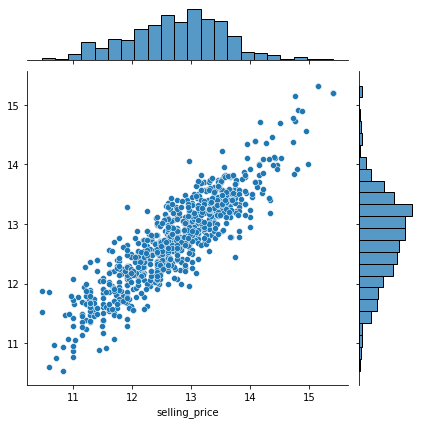

In [89]:
sns.jointplot(y_test_log,y_hat_log,kind='scatter')

The joint plot now looks a straight line and both actual selling price and predicted selling price follow normal distribution.

In [90]:
# Calculate the residuals
residuals_log = y_test_log - y_hat_log

x_km_log = np.ravel(X_test.iloc[:,0])
x_age_log = np.ravel(X_test.iloc[:,2])

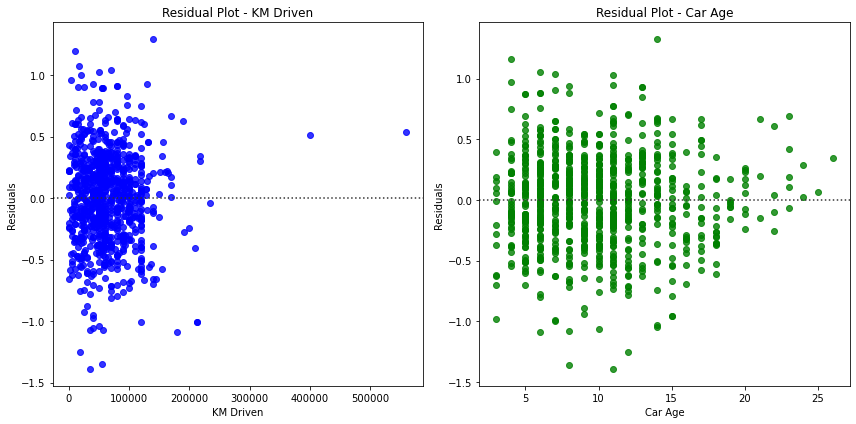

In [91]:
plt.figure(figsize=(12, 6))

# Subplot 1: Residual plot for KM Driven
plt.subplot(1, 2, 1)
sns.residplot(x_km_log, residuals_log, color='blue')
plt.xlabel('KM Driven')
plt.ylabel('Residuals')
plt.title('Residual Plot - KM Driven')

# Subplot 2: Residual plot for car age
plt.subplot(1, 2, 2)
sns.residplot(x_age_log, residuals_log, color='green')
plt.xlabel('Car Age')
plt.ylabel('Residuals')
plt.title('Residual Plot - Car Age')

plt.tight_layout()
plt.show()

Residual plots suggest that the heteroscedastic effect has significantly reduced as the shape no longer shows any distinctive pattern.

<a id="19"></a> <br>
## 9. Conclusion and potential further improvements

In this dataset, **log-linear relationship** exists between the selling price and explantory variables. Therefore it's suggested to transform the response variable before working on the regression model. Also we can use Q-Q plot and residual plot to identify non-linear relationship from data pattern.

Here're some suggestion to further improve the regression model:
- Use stepwise regression to eliminate independent variables that is not statistical significant
- Use PCA to reduce number of explantory variables
- Consider Ridge or Lasso Regression Variant to address the issues of multicollinearity and overfitting
- Consider machine learning technique like GridSearchCV and RepeatedKFold CrossValidation